# Latar Belakang
Sebuah supermarket menjual berbagai jenis produk seperti Fish, Meat, Fruits, Sweet Products, Wines, dan Gold Products. Supermarket telah melakukan beberapa kampanye dan memberikan diskon. Pendapatan marketing 11 dollar dan pengeluaran 3 dollar. Akan tetapi, pendapatan dan pengeluaran marketing tidak sesuai yang diharapkan. 

# Pernyataan Masalah
Supermarket ingin mengetahui mengapa hal itu bisa terjadi. Informasi ini akan membantu supermarket untuk meningkatkan pendapatan dan mengurangi pengeluaran. Oleh karena itu, muncul pertanyaan berikut:

**Bagaimana perilaku customer yang berbelanja di supermarket?**

**Apa yang menyebabkan pendapatan marketing 11 dollar dan pengeluaran 3 dollar?**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

Dataset ini berisi informasi customer yang berbelanja di supermarket. Ada 29 kolom di dalam dataset Supermarket Customers, yaitu:

**Customer**

- `ID` - ID customer
- `Year_Birth` - tahun kelahiran customer
- `Education` - tingkat pendidikan customer
- `Marital_Status` - status perkawinan customer
- `Kidhome` - jumlah anak kecil di rumah customer
- `Teenhome` - jumlah remaja di rumah tangga customer
- `Income` - pendapatan rumah tangga tahunan customer
- `Dt_Customer` - tanggal pendaftaran customer dengan perusahaan
- `Recency` - jumlah hari sejak pembelian terakhir
- `Complaint` - 1 jika customer komplain dalam 2 tahun terakhir, 0 sebaliknya

**Produk**

- `MntWines` - jumlah pembelanjaan produk anggur dalam 2 tahun terakhir
- `MntFruits` - jumlah pembelanjaan produk buah-buahan dalam 2 tahun terakhir
- `MntMeatProducts` - jumlah pembelanjaan produk daging dalam 2 tahun terakhir
- `MntFishProducts` - jumlah pembelanjaan produk ikan dalam 2 tahun terakhir
- `MntSweetProducts` - jumlah pembelanjaan produk manis dalam 2 tahun terakhir
- `MntGoldProds` - jumlah pembelanjaan produk emas dalam 2 tahun terakhir

**Promosi**

- `NumDealsPurchases` - jumlah pembelian dengan diskon
- `AcceptedCmp1` - 1 jika customer menerima penawaran di kampanye pertama, 0 sebaliknya
- `AcceptedCmp2` - 1 jika customer menerima penawaran di kampanye kedua, 0 sebaliknya
- `AcceptedCmp3` - 1 jika customer menerima penawaran di kampanye ketiga, 0 sebaliknya
- `AcceptedCmp4` - 1 jika customer menerima penawaran di kampanye keempat, 0 sebaliknya
- `AcceptedCmp5` - 1 jika customer menerima penawaran di kampanye kelima, 0 sebaliknya
- `Response` - 1 jika customer menerima penawaran di kampanye terakhir, 0 sebaliknya

**Tempat Pembelian**

- `NumWebPurchases` - jumlah pembelian melalui situs perusahaan
- `NumCatalogPurchases` - jumlah pembelian menggunakan katalog
- `NumStorePurchases` - jumlah pembelian langsung di supermarket
- `NumWebVisitsMonth` - jumlah kunjungan situs perusahaan dalam bulan terakhir

**Cost and Revenue**

- `Z_CostContact` - cost untuk menghubungi customer
- `Z_Revenue` - pendapatan setelah customer menerima penawaran


In [2]:
df=pd.read_csv('Supermarket Customers.csv', sep="\t")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [3]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [4]:
df[df['Marital_Status'] == 'Together']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,4749,1968,Graduation,Together,58554.0,1,1,26-09-2012,55,368,24,68,38,0,88,6,8,2,6,7,0,0,0,0,0,0,3,11,0
2228,8720,1978,2n Cycle,Together,NaN,0,0,12-08-2012,53,32,2,1607,12,4,22,0,0,0,1,0,0,1,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0


In [5]:
df[df['Marital_Status'] == 'Married']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
11,387,1976,Basic,Married,7500.0,0,0,13-11-2012,59,6,16,11,11,1,16,1,2,0,3,8,0,0,0,0,0,0,3,11,0
14,2569,1987,Graduation,Married,17323.0,0,0,10-10-2012,38,3,14,17,6,1,5,1,1,0,3,8,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226,4478,1979,Graduation,Married,63777.0,1,1,24-03-2013,87,457,5,106,15,17,53,8,11,1,6,8,0,0,0,0,0,0,3,11,0
2229,10084,1972,Graduation,Married,24434.0,2,0,18-05-2014,9,3,2,8,20,0,17,2,2,1,2,7,0,0,0,0,0,0,3,11,0
2234,8372,1974,Graduation,Married,34421.0,1,0,01-07-2013,81,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,0,3,11,0
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0


Sebelum mengubah type data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Pengamatan:
- Di dataset ada 29 kolom dan 2240 baris (ada 2240 customer)
- Di kolom Income ada 24 missing values

In [7]:
df[df['Income'].isna() == True]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool

In [9]:
df.duplicated().sum()

0

Tidak ada duplikasi data

In [10]:
KolomNumerik=['Year_Birth','Income','Recency', 'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
              'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
              'NumWebVisitsMonth', 'Kidhome', 'Teenhome']
df_deskripsi = df[KolomNumerik].describe().T
df_deskripsi

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0
MntGoldProds,2240.0,44.021875,52.167439,0.0,9.00,24.0,56.00,362.0
NumDealsPurchases,2240.0,2.325000,1.932238,0.0,1.00,2.0,3.00,15.0


Pengamatan:
- Rata-rata income 52247.25 dan median income 51381.5. Sedikit right-skew. Besides, Nilai minimum 1730 dan maksimum 666666
- Rata-rata hari sejak pembelian terakhir (Recency) 49.11 dan nilai minimum 0 maksimum 24
- Rata-rata pembelian produk anggur (MntWines) sejak 2 tahun terakhir 303.94
- Rata-rata pembelian produk buah-buahan (MntFruits) sejak 2 tahun terakhir 26.30
- Rata-rata pembelian produk daging (MntMeatProducts) sejak 2 tahun terakhir 166.95
- Rata-rata pembelian produk ikan (MntFishProducts) sejak 2 tahun terakhir 37.53
- Rata-rata pembelian produk manis (MntSweetProducts) sejak 2 tahun terakhir 27.06
- Rata-rata pembelian produk emas (MntGoldProds) sejak 2 tahun terakhir 44.02
- Rata-rata customer melakukan pembelian dengan diskon (NumDealsPurchases) sebanyak 2.33 dan maksimum pembelian sebanyak 15
- Rata-rata customer melakukan pembelian melalui situs perusahaan (NumWebPurchases) sebanyak 4.08 dan maksimum pembelian sebanyak 27
- Rata-rata customer melakukan pembelian menggunakan katalog (NumCatalogPurchases) sebanyak 2.66 dan maksimum pembelian sebanyak 28
- Rata-rata customer melakukan pembelian langsung di supermarket (NumStorePurchases) sebanyak 5.79 dan maksimum pembelian sebanyak 13
- Rata-rata customer mengunjungi situs perusahaan bulan terakhir (NumWebVisitsMonth) sebanyak 5.32 dan maksimum kunjungan sebanyak 20
- Jumlah maksimum anak (Kidhome) dan remaja (Teenhome) masing-masing adalah 2

In [11]:
df_deskripsi['IQR'] = df_deskripsi['75%'] - df_deskripsi['25%']
df_deskripsi['Lower'] = df_deskripsi['25%'] - 1.5*df_deskripsi['IQR']
df_deskripsi['Upper'] = df_deskripsi['75%'] + 1.5*df_deskripsi['IQR']
df_deskripsi['Outlier'] = [df[(df['Year_Birth'] < df_deskripsi['Lower']['Year_Birth']) | (df['Year_Birth'] > df_deskripsi['Upper']['Year_Birth'])]['Year_Birth'].count(),
                           df[(df['Income'] < df_deskripsi['Lower']['Income']) | (df['Income'] > df_deskripsi['Upper']['Income'])]['Income'].count(),
                           df[(df['Kidhome'] < df_deskripsi['Lower']['Kidhome']) | (df['Kidhome'] > df_deskripsi['Upper']['Kidhome'])]['Kidhome'].count(),
                           df[(df['Teenhome'] < df_deskripsi['Lower']['Teenhome']) | (df['Teenhome'] > df_deskripsi['Upper']['Teenhome'])]['Teenhome'].count(),
                           df[(df['Recency'] < df_deskripsi['Lower']['Recency']) | (df['Recency'] > df_deskripsi['Upper']['Recency'])]['Recency'].count(),
                           df[(df['MntWines'] < df_deskripsi['Lower']['MntWines']) | (df['MntWines'] > df_deskripsi['Upper']['MntWines'])]['MntWines'].count(),
                           df[(df['MntFruits'] < df_deskripsi['Lower']['MntFruits']) | (df['MntFruits'] > df_deskripsi['Upper']['MntFruits'])]['MntFruits'].count(),
                           df[(df['MntMeatProducts'] < df_deskripsi['Lower']['MntMeatProducts']) | (df['MntMeatProducts'] > df_deskripsi['Upper']['MntMeatProducts'])]['MntMeatProducts'].count(),
                           df[(df['MntFishProducts'] < df_deskripsi['Lower']['MntFishProducts']) | (df['MntFishProducts'] > df_deskripsi['Upper']['MntFishProducts'])]['MntFishProducts'].count(),
                           df[(df['MntSweetProducts'] < df_deskripsi['Lower']['MntSweetProducts']) | (df['MntSweetProducts'] > df_deskripsi['Upper']['MntSweetProducts'])]['MntSweetProducts'].count(),
                           df[(df['MntGoldProds'] < df_deskripsi['Lower']['MntGoldProds']) | (df['MntGoldProds'] > df_deskripsi['Upper']['MntGoldProds'])]['MntGoldProds'].count(),
                           df[(df['NumDealsPurchases'] < df_deskripsi['Lower']['NumDealsPurchases']) | (df['NumDealsPurchases'] > df_deskripsi['Upper']['NumDealsPurchases'])]['NumDealsPurchases'].count(),
                           df[(df['NumWebPurchases'] < df_deskripsi['Lower']['NumWebPurchases']) | (df['NumWebPurchases'] > df_deskripsi['Upper']['NumWebPurchases'])]['NumWebPurchases'].count(),
                           df[(df['NumCatalogPurchases'] < df_deskripsi['Lower']['NumCatalogPurchases']) | (df['NumCatalogPurchases'] > df_deskripsi['Upper']['NumCatalogPurchases'])]['NumCatalogPurchases'].count(),
                           df[(df['NumStorePurchases'] < df_deskripsi['Lower']['NumStorePurchases']) | (df['NumStorePurchases'] > df_deskripsi['Upper']['NumStorePurchases'])]['NumStorePurchases'].count(),
                           df[(df['NumWebVisitsMonth'] < df_deskripsi['Lower']['NumWebVisitsMonth']) | (df['NumWebVisitsMonth'] > df_deskripsi['Upper']['NumWebVisitsMonth'])]['NumWebVisitsMonth'].count()]
df_deskripsi

,count,mean,std,min,25%,50%,75%,max,IQR,Lower,Upper,Outlier
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0,18.0,1932.0,2004.0,3
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0,33219.0,-14525.5,118350.5,8
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0,50.0,-51.0,149.0,0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0,480.5,-697.0,1225.0,0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0,32.0,-47.0,81.0,0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0,216.0,-308.0,556.0,35
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0,47.0,-67.5,120.5,227
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0,32.0,-47.0,81.0,175
MntGoldProds,2240.0,44.021875,52.167439,0.0,9.00,24.0,56.00,362.0,47.0,-61.5,126.5,223
NumDealsPurchases,2240.0,2.325000,1.932238,0.0,1.00,2.0,3.00,15.0,2.0,-2.0,6.0,248


In [12]:
df[(df['Year_Birth'] < df_deskripsi['Lower']['Year_Birth']) | (df['Year_Birth'] > df_deskripsi['Upper']['Year_Birth'])]['Year_Birth']

192    1900
239    1893
339    1899
Name: Year_Birth, dtype: int64

In [13]:
df[(df['Income'] < df_deskripsi['Lower']['Income']) | (df['Income'] > df_deskripsi['Upper']['Income'])]['Income']

164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64

In [14]:
df[(df['Income'] < df_deskripsi['Lower']['Income']) | (df['Income'] > df_deskripsi['Upper']['Income'])]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,3,11,0
617,1503,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,3,11,0
655,5555,1975,Graduation,Divorced,153924.0,0,0,07-02-2014,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,3,11,0
1653,4931,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,3,11,0
2132,11181,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0


# Data Cleaning

In [15]:
df = df[~(df["Year_Birth"] <= 1900)]
df = df[~(df["Income"] >= 153924)].reset_index(drop=True)
df = df.drop(columns = ['Dt_Customer', 'Z_CostContact', 'Z_Revenue'])
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,10870,1967,Graduation,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2225,4001,1946,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2226,7270,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2227,8235,1956,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


Di kolom Year_Birth, ada 3 outlier. Tahun kelahiran yaitu 1893, 1899, dan 1900. Data ini dihapus karena kemungkinan kesalahan input data dan tidak memungkinkan masih hidup sampai usia ratusan tahun, sehingga data ini perlu dihapus.

Di kolom Income, ada 8 outlier dan dihapus karena jumlah 8 sedikit, jumlah pembelanjaan sedikit, dan tidak ada yang menerima penawaran.

Sisa outlier tidak dihapus karena masih diperlukan untuk analisis data lebih lanjut dan jumlahnya per kolom banyak.

Kolom Dt_Customer, Z_CostContact, dan Z_Revenue dihapus karena tidak diperlukan untuk analisis

In [16]:
df[df['Income'].isna()==True]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1994,1983,Graduation,Married,NaN,1,0,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0
27,5255,1986,Graduation,Single,NaN,1,0,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0
43,7281,1959,PhD,Single,NaN,0,0,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,0
48,7244,1951,Graduation,Single,NaN,2,1,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,0
58,8557,1982,Graduation,Single,NaN,1,0,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,0
71,10629,1973,2n Cycle,Married,NaN,1,0,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,0
90,8996,1957,PhD,Married,NaN,2,1,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0
91,9235,1957,Graduation,Single,NaN,1,1,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,0
92,5798,1973,Master,Together,NaN,0,0,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,0
128,8268,1961,PhD,Married,NaN,0,1,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0


In [17]:
df['Income'] = df['Income'].fillna(value=df['Income'].median())
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,10870,1967,Graduation,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2225,4001,1946,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2226,7270,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2227,8235,1956,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


Missing values kolom Income diisi dengan nilai median Income karena mean > median

Setelah cleaning data, jumlah baris menjadi 2229 dari 2240

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2229 non-null   int64  
 1   Year_Birth           2229 non-null   int64  
 2   Education            2229 non-null   object 
 3   Marital_Status       2229 non-null   object 
 4   Income               2229 non-null   float64
 5   Kidhome              2229 non-null   int64  
 6   Teenhome             2229 non-null   int64  
 7   Recency              2229 non-null   int64  
 8   MntWines             2229 non-null   int64  
 9   MntFruits            2229 non-null   int64  
 10  MntMeatProducts      2229 non-null   int64  
 11  MntFishProducts      2229 non-null   int64  
 12  MntSweetProducts     2229 non-null   int64  
 13  MntGoldProds         2229 non-null   int64  
 14  NumDealsPurchases    2229 non-null   int64  
 15  NumWebPurchases      2229 non-null   i

In [19]:
df_deskripsi = df[KolomNumerik].describe().T
df_deskripsi

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2229.0,1968.888739,11.707430,1940.0,1959.0,1970.0,1977.0,1996.0
Income,2229.0,51618.486765,20601.230318,1730.0,35416.0,51287.0,68118.0,113734.0
Recency,2229.0,49.106326,28.946476,0.0,24.0,49.0,74.0,99.0
MntWines,2229.0,304.991476,336.761943,0.0,24.0,176.0,505.0,1493.0
MntFruits,2229.0,26.348587,39.764060,0.0,2.0,8.0,33.0,199.0
MntMeatProducts,2229.0,165.283984,219.336589,0.0,16.0,67.0,231.0,1725.0
MntFishProducts,2229.0,37.642441,54.700548,0.0,3.0,12.0,50.0,259.0
MntSweetProducts,2229.0,27.161507,41.338945,0.0,1.0,8.0,34.0,263.0
MntGoldProds,2229.0,44.113055,52.091255,0.0,9.0,24.0,56.0,362.0
NumDealsPurchases,2229.0,2.319874,1.895252,0.0,1.0,2.0,3.0,15.0


In [20]:
df_deskripsi['IQR'] = df_deskripsi['75%'] - df_deskripsi['25%']
df_deskripsi['Lower'] = df_deskripsi['25%'] - 1.5*df_deskripsi['IQR']
df_deskripsi['Upper'] = df_deskripsi['75%'] + 1.5*df_deskripsi['IQR']
df_deskripsi['Outlier'] = [df[(df['Year_Birth'] < df_deskripsi['Lower']['Year_Birth']) | (df['Year_Birth'] > df_deskripsi['Upper']['Year_Birth'])]['Year_Birth'].count(),
                           df[(df['Income'] < df_deskripsi['Lower']['Income']) | (df['Income'] > df_deskripsi['Upper']['Income'])]['Income'].count(),
                           df[(df['Kidhome'] < df_deskripsi['Lower']['Kidhome']) | (df['Kidhome'] > df_deskripsi['Upper']['Kidhome'])]['Kidhome'].count(),
                           df[(df['Teenhome'] < df_deskripsi['Lower']['Teenhome']) | (df['Teenhome'] > df_deskripsi['Upper']['Teenhome'])]['Teenhome'].count(),
                           df[(df['Recency'] < df_deskripsi['Lower']['Recency']) | (df['Recency'] > df_deskripsi['Upper']['Recency'])]['Recency'].count(),
                           df[(df['MntWines'] < df_deskripsi['Lower']['MntWines']) | (df['MntWines'] > df_deskripsi['Upper']['MntWines'])]['MntWines'].count(),
                           df[(df['MntFruits'] < df_deskripsi['Lower']['MntFruits']) | (df['MntFruits'] > df_deskripsi['Upper']['MntFruits'])]['MntFruits'].count(),
                           df[(df['MntMeatProducts'] < df_deskripsi['Lower']['MntMeatProducts']) | (df['MntMeatProducts'] > df_deskripsi['Upper']['MntMeatProducts'])]['MntMeatProducts'].count(),
                           df[(df['MntFishProducts'] < df_deskripsi['Lower']['MntFishProducts']) | (df['MntFishProducts'] > df_deskripsi['Upper']['MntFishProducts'])]['MntFishProducts'].count(),
                           df[(df['MntSweetProducts'] < df_deskripsi['Lower']['MntSweetProducts']) | (df['MntSweetProducts'] > df_deskripsi['Upper']['MntSweetProducts'])]['MntSweetProducts'].count(),
                           df[(df['MntGoldProds'] < df_deskripsi['Lower']['MntGoldProds']) | (df['MntGoldProds'] > df_deskripsi['Upper']['MntGoldProds'])]['MntGoldProds'].count(),
                           df[(df['NumDealsPurchases'] < df_deskripsi['Lower']['NumDealsPurchases']) | (df['NumDealsPurchases'] > df_deskripsi['Upper']['NumDealsPurchases'])]['NumDealsPurchases'].count(),
                           df[(df['NumWebPurchases'] < df_deskripsi['Lower']['NumWebPurchases']) | (df['NumWebPurchases'] > df_deskripsi['Upper']['NumWebPurchases'])]['NumWebPurchases'].count(),
                           df[(df['NumCatalogPurchases'] < df_deskripsi['Lower']['NumCatalogPurchases']) | (df['NumCatalogPurchases'] > df_deskripsi['Upper']['NumCatalogPurchases'])]['NumCatalogPurchases'].count(),
                           df[(df['NumStorePurchases'] < df_deskripsi['Lower']['NumStorePurchases']) | (df['NumStorePurchases'] > df_deskripsi['Upper']['NumStorePurchases'])]['NumStorePurchases'].count(),
                           df[(df['NumWebVisitsMonth'] < df_deskripsi['Lower']['NumWebVisitsMonth']) | (df['NumWebVisitsMonth'] > df_deskripsi['Upper']['NumWebVisitsMonth'])]['NumWebVisitsMonth'].count()]
df_deskripsi

,count,mean,std,min,25%,50%,75%,max,IQR,Lower,Upper,Outlier
Year_Birth,2229.0,1968.888739,11.707430,1940.0,1959.0,1970.0,1977.0,1996.0,18.0,1932.0,2004.0,0
Income,2229.0,51618.486765,20601.230318,1730.0,35416.0,51287.0,68118.0,113734.0,32702.0,-13637.0,117171.0,0
Recency,2229.0,49.106326,28.946476,0.0,24.0,49.0,74.0,99.0,50.0,-51.0,149.0,0
MntWines,2229.0,304.991476,336.761943,0.0,24.0,176.0,505.0,1493.0,481.0,-697.5,1226.5,0
MntFruits,2229.0,26.348587,39.764060,0.0,2.0,8.0,33.0,199.0,31.0,-44.5,79.5,0
MntMeatProducts,2229.0,165.283984,219.336589,0.0,16.0,67.0,231.0,1725.0,215.0,-306.5,553.5,35
MntFishProducts,2229.0,37.642441,54.700548,0.0,3.0,12.0,50.0,259.0,47.0,-67.5,120.5,247
MntSweetProducts,2229.0,27.161507,41.338945,0.0,1.0,8.0,34.0,263.0,33.0,-48.5,83.5,173
MntGoldProds,2229.0,44.113055,52.091255,0.0,9.0,24.0,56.0,362.0,47.0,-61.5,126.5,223
NumDealsPurchases,2229.0,2.319874,1.895252,0.0,1.0,2.0,3.0,15.0,2.0,-2.0,6.0,240


In [21]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,10870,1967,Graduation,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2225,4001,1946,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2226,7270,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2227,8235,1956,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


In [22]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

2n Cycle dan Master artinya sama sehingga dapat digabung
2n Cycle = graduate level or master's level studies (https://www.studera.nu/startpage/higher-education-studies/higher-education-in-sweden/study-levels-and-degrees/#:~:text=First%20cycle%20is%20for%20the,offered%20at%20all%20three%20cycles.)

In [23]:
df['Education'].replace('2n Cycle', 'Master', inplace=True)

In [24]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic'], dtype=object)

In [25]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

- Alone sama Single dapat digabung
- Alone merupakan sinonim dari Single (https://wikidiff.com/single/alone)
- Together dan Married tidak digabung karena Together lebih ke arti hidup bersama tanpa status pernikahan sah (https://www.citizensadvice.org.uk/family/living-together-marriage-and-civil-partnership/living-together-and-marriage-legal-differences/)
- Absurd dan YOLO artinya tidak diketahui. Sehingga, dapat dikategorikan Others 

In [26]:
df['Marital_Status'].replace('Alone', 'Single', inplace=True)

In [27]:
df['Marital_Status'].replace(['Absurd', 'YOLO'], 'Others', inplace=True)

In [28]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Others'],
      dtype=object)

# Analisis

## Year_Birth

In [29]:
df['Year_Birth'].unique()

array([1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983,
       1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969,
       1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977,
       1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962,
       1953, 1961, 1956, 1992, 1990, 1947, 1993, 1994, 1941, 1944, 1995,
       1940], dtype=int64)

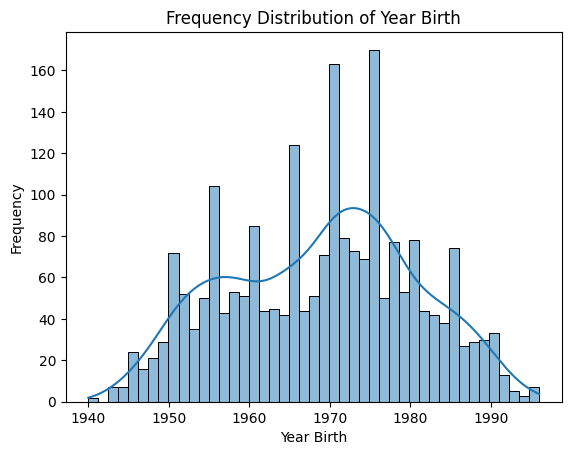

In [30]:
sns.histplot(data=df, x='Year_Birth', bins=45, kde=True)
plt.title('Frequency Distribution of Year Birth')
plt.xlabel('Year Birth')
plt.ylabel('Frequency')

plt.show()

Dari nilai mean mendekati median, tetapi dari grafik terlihat tidak normal. Dapat disimpulkan data Year_Birth tidak terdistribusi normal.

In [31]:
df['Year_Birth'].max() - df['Year_Birth'].min()

56

**Membuat Kolom `Age Group`**

Akan disederhanakan lagi :
- Group 1  1940-1958
- Group 2  1959-1977
- Group 3  1978-1996

Disederhakan supaya dapat dianalisis berdasarkan kelompok tahun kelahiran

In [32]:
def year_birth_group(x):
    if x < 1959:
        group = '1940-1958'
    elif x > 1977:
        group = '1978-1996'
    else:
        group = '1959-1977'
    return group

df['Year_Birth_Group'] = df['Year_Birth'].apply(lambda x: year_birth_group(x))

In [33]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year_Birth_Group
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1940-1958
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,1940-1958
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,1959-1977
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,1978-1996
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,1978-1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,10870,1967,Graduation,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,1959-1977
2225,4001,1946,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,1940-1958
2226,7270,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,1978-1996
2227,8235,1956,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,1940-1958


## Total Customers

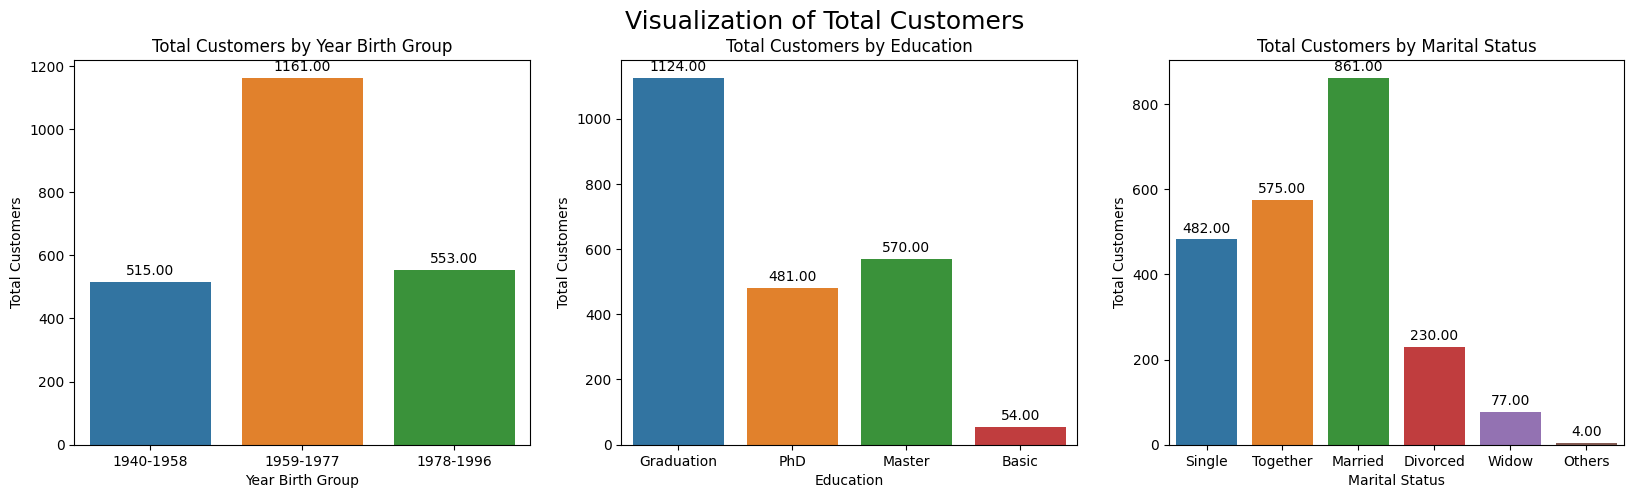

In [34]:
plt.figure(figsize=(20,5))

# plot 1
# Vertical Bar Chart
# plt.subplot(baris, kolom, posisi)
plt.subplot(1, 3, 1)
ax1 = sns.barplot(data=df, x='Year_Birth_Group', y='Year_Birth', estimator=len, ci=0);
plt.title('Total Customers by Year Birth Group')
plt.xlabel('Year Birth Group')
plt.ylabel('Total Customers');
for bar in ax1.patches:
    ax1.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

# plot 2
plt.subplot(1, 3, 2)
ax2 = sns.barplot(data=df, x='Education', y='Year_Birth', estimator=len, ci=0);
plt.title('Total Customers by Education')
plt.xlabel('Education')
plt.ylabel('Total Customers');
for bar in ax2.patches:
    ax2.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

#plot 3
plt.subplot(1, 3, 3)
ax3 = sns.barplot(data=df, x='Marital_Status', y='Year_Birth', estimator=len, ci=0);
plt.title('Total Customers by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Customers');
for bar in ax3.patches:
    ax3.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.suptitle('Visualization of Total Customers', size=18);

Insight :
- Customer yang berbelanja di supermarket didomininasi oleh tahun kelahiran 1959-1977 sebanyak 1161 orang
- Disusul oleh customer tahun kelahiran 1978-1996 sebanyak 553 orang dan 1940-1958 sebanyak 515 orang
- Berdasarkan pendidikan, customer yang berbelanja di supermarket didomininasi oleh Graduation sebanyak 1124 orang
- Disusul oleh customer lulusan Master sebanyak 570 orang, PhD 481 orang, dan Basic 54 orang
- Berdasarkan status perkawinan, customer yang berbelanja di supermarket didomininasi oleh Married sebanyak 861 orang
- Disusul oleh customer Together sebanyak 575 orang, Single 482 orang, Divorced 230 orang, Widow 77 orang, dan Others 4 orang

## Income

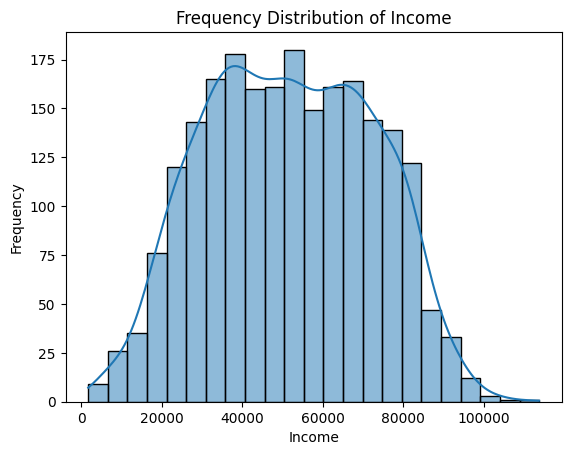

In [35]:
sns.histplot(data=df, x='Income', kde=True)
plt.title('Frequency Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')

plt.show()

Distribusi data Income terlihat uniform

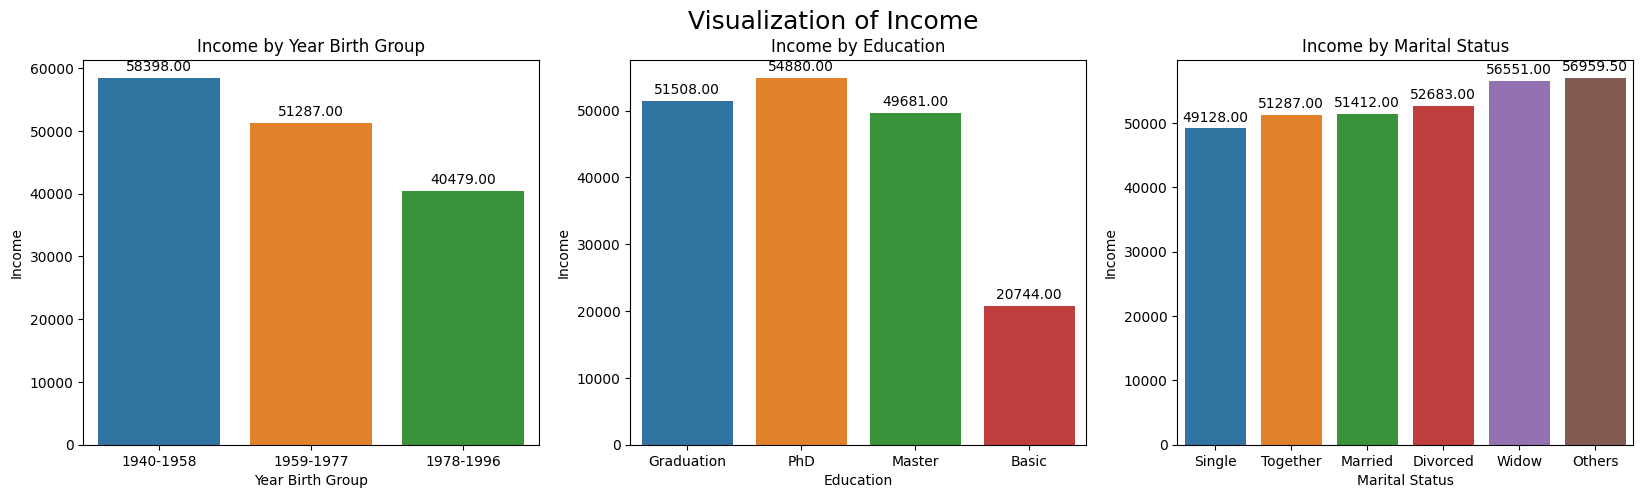

In [36]:
plt.figure(figsize=(20,5))

# plot 1
# Vertical Bar Chart
# plt.subplot(baris, kolom, posisi)
plt.subplot(1, 3, 1)
ax1 = sns.barplot(data=df, 
            x='Year_Birth_Group', 
            y='Income',
            estimator= np.median,
            ci=0)
plt.title('Income by Year Birth Group')
plt.xlabel('Year Birth Group')
plt.ylabel('Income');
for bar in ax1.patches:
    ax1.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

# plot 2
plt.subplot(1, 3, 2)
ax2 = sns.barplot(data=df, 
            x='Education', 
            y='Income',
            estimator= np.median,
            ci=0)
plt.title('Income by Education')
plt.xlabel('Education')
plt.ylabel('Income');
for bar in ax2.patches:
    ax2.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

#plot 3
plt.subplot(1, 3, 3)
ax3 = sns.barplot(data=df, 
            x='Marital_Status', 
            y='Income',
            estimator= np.median,
            ci=0)
plt.title('Income by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Income');
for bar in ax3.patches:
    ax3.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.suptitle('Visualization of Income', size=18);

Insight :
- Income terbesar berasal dari customer tahun kelahiran 1940-1958
- Semakin tua usia customer, income semakin besar
- Income terbesar berasal dari customer berpendidikan PhD
- Income terbesar berasal dari customer status perkawinan Others

## AcceptedCmp

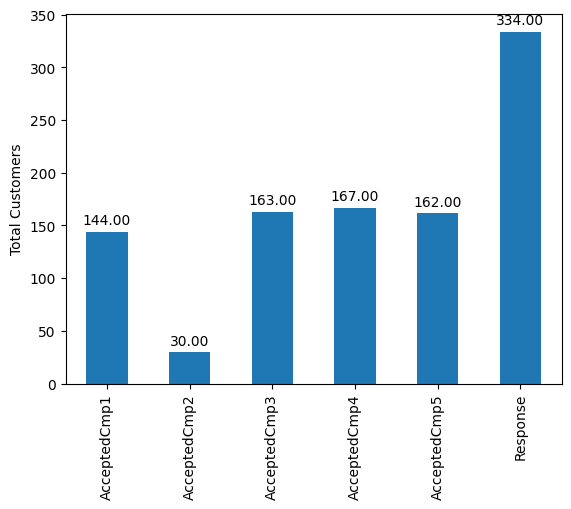

In [37]:
KolomCmp=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

CmpSukses=df[KolomCmp].sum()

ax = CmpSukses.plot(kind='bar')
plt.ylabel('Total Customers')

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.show()

Insight:

- Jumlah customer yang menerima penawaran "AcceptedCmp1" 144 orang
- Jumlah customer yang menerima penawaran "AcceptedCmp2" 30 orang. Jumlah yang paling sedikit dibandingkan kampanye lainnya. Kemungkinan penawaran kurang menarik dibandingkan dengan kampanye lainnya 
- Jumlah customer yang menerima penawaran "AcceptedCmp3" 163 orang
- Jumlah customer yang menerima penawaran "AcceptedCmp4" 167 orang
- Jumlah customer yang menerima penawaran "AcceptedCmp5" 162 orang
- Jumlah customer yang menerima penawaran di kampanye terakhir "Response" 334 orang
- Jumlah customer paling banyak menerima penawaran di kampanye terakhir "Response"
- Jumlah customer yang menerima penawaran "AcceptedCmp3", "AcceptedCmp4", dan "AcceptedCmp5" hampir sama

### AcceptedCmp1

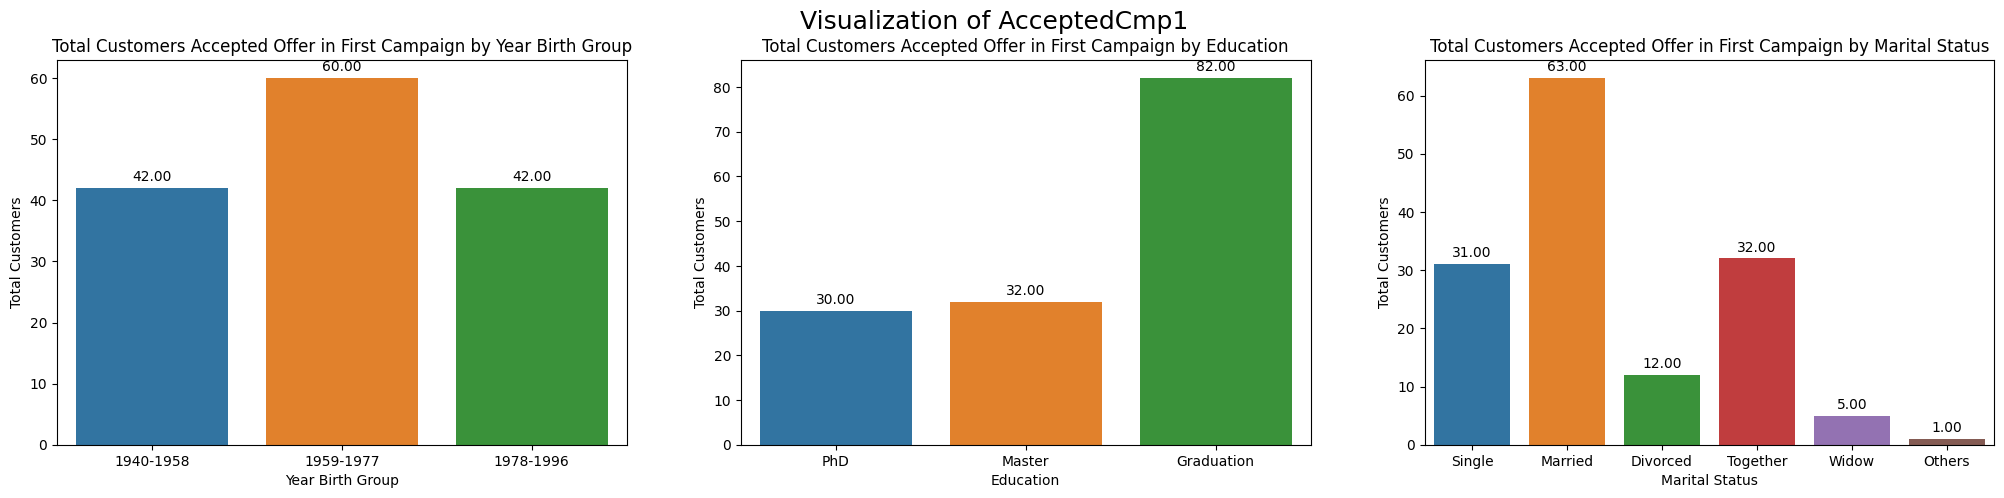

In [38]:
plt.figure(figsize=(25,5))

# plot 1
# Vertical Bar Chart
# plt.subplot(baris, kolom, posisi)
plt.subplot(1, 3, 1)
ax1 = sns.barplot(data=df[df['AcceptedCmp1'] == 1],
            x='Year_Birth_Group', 
            y='AcceptedCmp1',
            estimator= len,
            ci=0)
plt.title('Total Customers Accepted Offer in First Campaign by Year Birth Group')
plt.xlabel('Year Birth Group')
plt.ylabel('Total Customers');
for bar in ax1.patches:
    ax1.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

# plot 2
plt.subplot(1, 3, 2)
ax2 = sns.barplot(data=df[df['AcceptedCmp1'] == 1],
            x='Education', 
            y='AcceptedCmp1',
            estimator= len,
            ci=0)
plt.title('Total Customers Accepted Offer in First Campaign by Education')
plt.xlabel('Education')
plt.ylabel('Total Customers');
for bar in ax2.patches:
    ax2.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

#plot 3
plt.subplot(1, 3, 3)
ax3 = sns.barplot(data=df[df['AcceptedCmp1'] == 1],
            x='Marital_Status', 
            y='AcceptedCmp1',
            estimator= len,
            ci=0)
plt.title('Total Customers Accepted Offer in First Campaign by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Customers');
for bar in ax3.patches:
    ax3.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.suptitle('Visualization of AcceptedCmp1', size=18);

Insight:
- Customer tahun kelahiran 1959-1977 yang paling banyak menerima penawaran di kampanye pertama sebanyak 60 orang
- Jumlah customer tahun kelahiran 1940-1958 dan 1978-1996 sama 42 orang
- Customer lulusan Graduation yang paling banyak menerima penawaran di kampanye pertama
- Jumlah customer lulusan Master dan PhD hampir sama
- Tidak ada customer lulusan Basic yang menerima penawaran di kampanye pertama
- Customer Married yang paling banyak menerima penawaran di kampanye pertama
- Jumlah customer Single dan Together hampir sama

### AcceptedCmp2

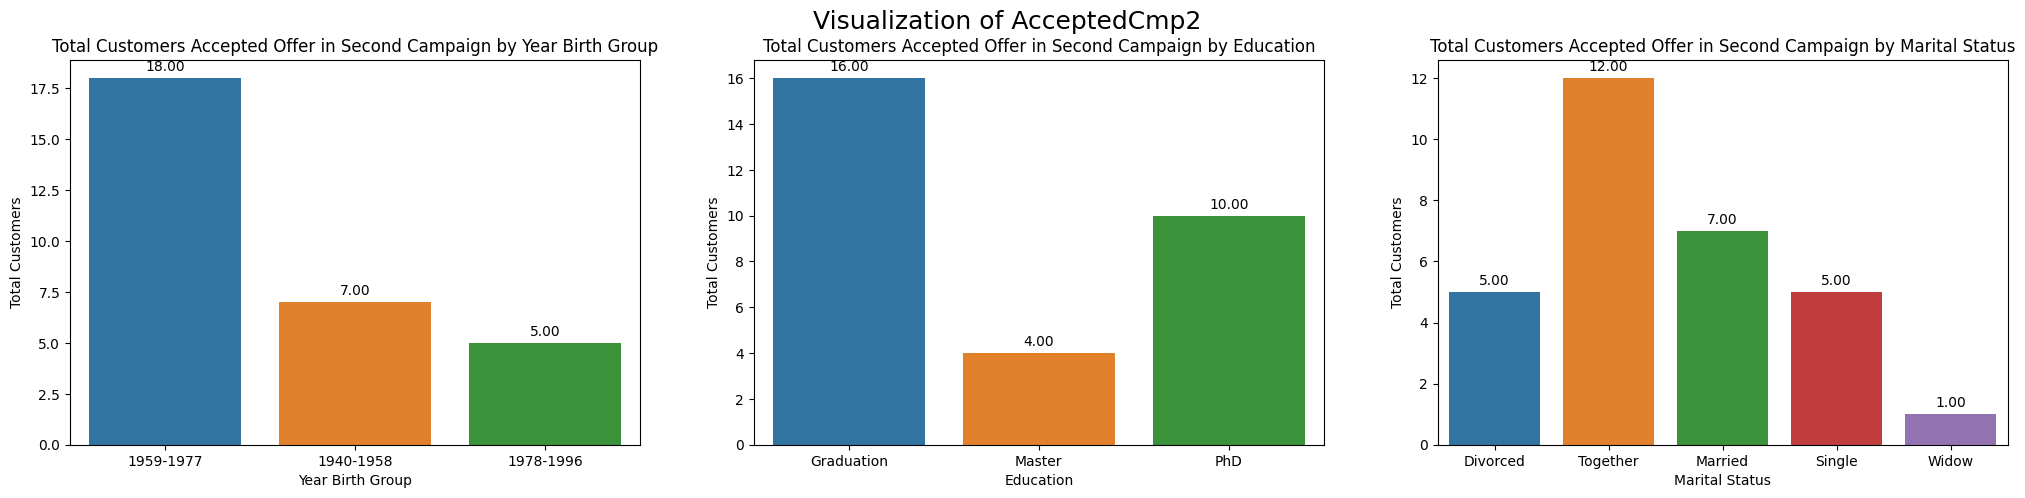

In [39]:
plt.figure(figsize=(25,5))

# plot 1
# Vertical Bar Chart
# plt.subplot(baris, kolom, posisi)
plt.subplot(1, 3, 1)
ax1 = sns.barplot(data=df[df['AcceptedCmp2'] == 1],
            x='Year_Birth_Group', 
            y='AcceptedCmp2',
            estimator= len,
            ci=0)
plt.title('Total Customers Accepted Offer in Second Campaign by Year Birth Group')
plt.xlabel('Year Birth Group')
plt.ylabel('Total Customers');
for bar in ax1.patches:
    ax1.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

# plot 2
plt.subplot(1, 3, 2)
ax2 = sns.barplot(data=df[df['AcceptedCmp2'] == 1],
            x='Education', 
            y='AcceptedCmp2',
            estimator= len,
            ci=0)
plt.title('Total Customers Accepted Offer in Second Campaign by Education')
plt.xlabel('Education')
plt.ylabel('Total Customers');
for bar in ax2.patches:
    ax2.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
#plot 3
plt.subplot(1, 3, 3)
ax3 = sns.barplot(data=df[df['AcceptedCmp2'] == 1],
            x='Marital_Status', 
            y='AcceptedCmp2',
            estimator= len,
            ci=0)
plt.title('Total Customers Accepted Offer in Second Campaign by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Customers');
for bar in ax3.patches:
    ax3.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.suptitle('Visualization of AcceptedCmp2', size=18);

Insight:
- Customer tahun kelahiran 1959-1977 yang paling banyak menerima penawaran di kampanye kedua
- Jumlah customer tahun kelahiran 1940-1958 dan 1978-1996 hampir sama
- Customer lulusan Graduation yang paling banyak menerima penawaran di kampanye kedua
- Tidak ada customer lulusan Basic yang menerima penawaran di kampanye kedua
- Customer Together yang paling banyak menerima penawaran di kampanye kedua sebanyak 12 orang
- Jumlah customer Divorced dan Single sama 5 orang

### AcceptedCmp3

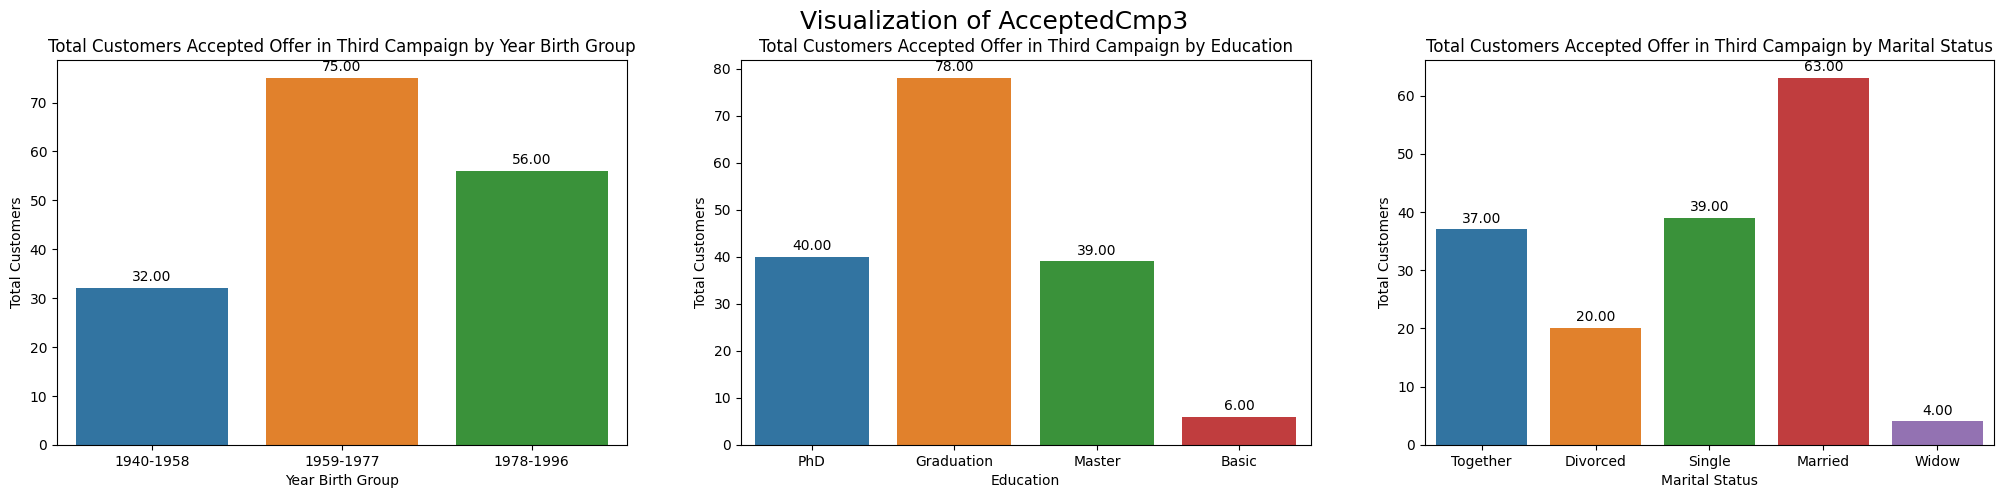

In [40]:
plt.figure(figsize=(25,5))

# plot 1
# Vertical Bar Chart
# plt.subplot(baris, kolom, posisi)
plt.subplot(1, 3, 1)
ax1 = sns.barplot(data=df[df['AcceptedCmp3'] == 1],
            x='Year_Birth_Group', 
            y='AcceptedCmp3',
            estimator= len,
            ci=0)
plt.title('Total Customers Accepted Offer in Third Campaign by Year Birth Group')
plt.xlabel('Year Birth Group')
plt.ylabel('Total Customers');
for bar in ax1.patches:
    ax1.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

# plot 2
plt.subplot(1, 3, 2)
ax2 = sns.barplot(data=df[df['AcceptedCmp3'] == 1],
            x='Education', 
            y='AcceptedCmp3',
            estimator= len,
            ci=0)
plt.title('Total Customers Accepted Offer in Third Campaign by Education')
plt.xlabel('Education')
plt.ylabel('Total Customers');
for bar in ax2.patches:
    ax2.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
#plot 3
plt.subplot(1, 3, 3)
ax3 = sns.barplot(data=df[df['AcceptedCmp3'] == 1],
            x='Marital_Status', 
            y='AcceptedCmp3',
            estimator= len,
            ci=0)
plt.title('Total Customers Accepted Offer in Third Campaign by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Customers');
for bar in ax3.patches:
    ax3.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.suptitle('Visualization of AcceptedCmp3', size=18);

Insight:
- Customer tahun kelahiran 1959-1977 yang paling banyak menerima penawaran di kampanye ketiga
- Customer lulusan Graduation yang paling banyak menerima penawaran di kampanye ketiga
- Jumlah customer lulusan PhD dan Master hampir sama
- Customer Married yang paling banyak menerima penawaran di kampanye ketiga
- Jumlah customer Single dan Together hampir sama

### AcceptedCmp4

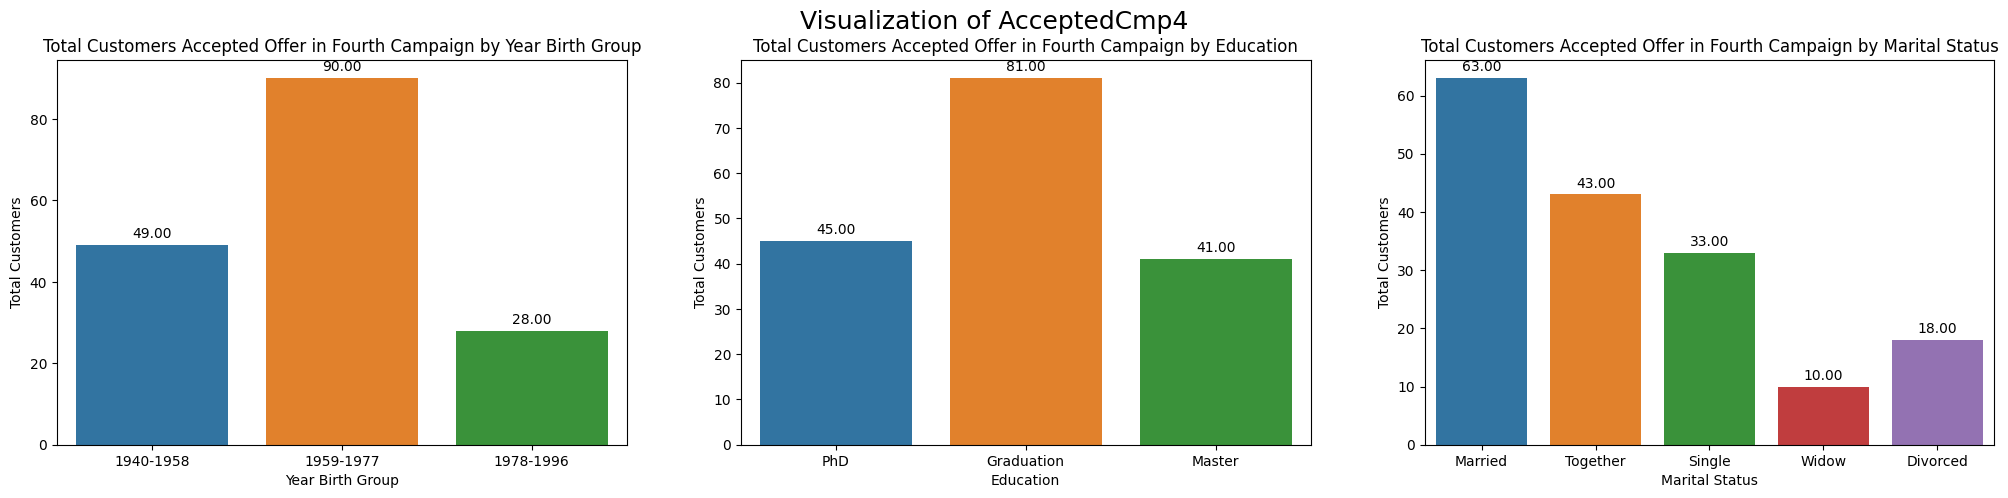

In [41]:
plt.figure(figsize=(25,5))

# plot 1
# Vertical Bar Chart
# plt.subplot(baris, kolom, posisi)
plt.subplot(1, 3, 1)
ax1 = sns.barplot(data=df[df['AcceptedCmp4'] == 1],
            x='Year_Birth_Group', 
            y='AcceptedCmp4',
            estimator= len,
            ci=0)
plt.title('Total Customers Accepted Offer in Fourth Campaign by Year Birth Group')
plt.xlabel('Year Birth Group')
plt.ylabel('Total Customers');
for bar in ax1.patches:
    ax1.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

# plot 2
plt.subplot(1, 3, 2)
ax2 = sns.barplot(data=df[df['AcceptedCmp4'] == 1],
            x='Education', 
            y='AcceptedCmp4',
            estimator= len,
            ci=0)
plt.title('Total Customers Accepted Offer in Fourth Campaign by Education')
plt.xlabel('Education')
plt.ylabel('Total Customers');
for bar in ax2.patches:
    ax2.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
#plot 3
plt.subplot(1, 3, 3)
ax3 = sns.barplot(data=df[df['AcceptedCmp4'] == 1],
            x='Marital_Status', 
            y='AcceptedCmp4',
            estimator= len,
            ci=0)
plt.title('Total Customers Accepted Offer in Fourth Campaign by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Customers');
for bar in ax3.patches:
    ax3.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.suptitle('Visualization of AcceptedCmp4', size=18);

Insight:
- Customer tahun kelahiran 1959-1977 yang paling banyak menerima penawaran di kampanye keempat
- Customer berpendidikan Graduation yang paling banyak menerima penawaran di kampanye keempat
- Jumlah customer berpendidikan Master dan PhD hampir sama
- Customer Married yang paling banyak menerima penawaran di kampanye keempat
- Customer Others tidak ada yang menerima penawaran di kampanye keempat

### AcceptedCmp5

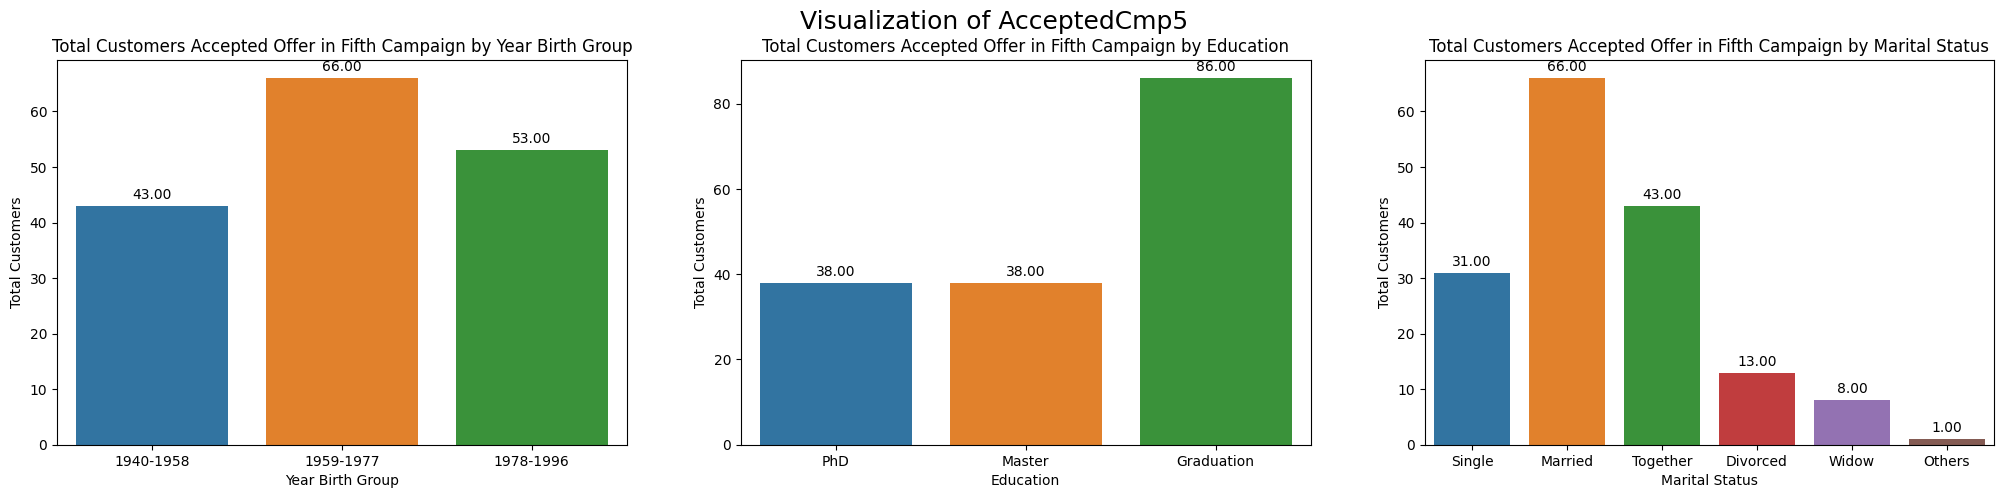

In [42]:
plt.figure(figsize=(25,5))

# plot 1
# Vertical Bar Chart
# plt.subplot(baris, kolom, posisi)
plt.subplot(1, 3, 1)
ax1 = sns.barplot(data=df[df['AcceptedCmp5'] == 1],
            x='Year_Birth_Group', 
            y='AcceptedCmp5',
            estimator= len,
            ci=0)
plt.title('Total Customers Accepted Offer in Fifth Campaign by Year Birth Group')
plt.xlabel('Year Birth Group')
plt.ylabel('Total Customers');
for bar in ax1.patches:
    ax1.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

# plot 2
plt.subplot(1, 3, 2)
ax2 = sns.barplot(data=df[df['AcceptedCmp5'] == 1],
            x='Education', 
            y='AcceptedCmp5',
            estimator= len,
            ci=0)
plt.title('Total Customers Accepted Offer in Fifth Campaign by Education')
plt.xlabel('Education')
plt.ylabel('Total Customers');
for bar in ax2.patches:
    ax2.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
#plot 3
plt.subplot(1, 3, 3)
ax3 = sns.barplot(data=df[df['AcceptedCmp5'] == 1],
            x='Marital_Status', 
            y='AcceptedCmp5',
            estimator= len,
            ci=0)
plt.title('Total Customers Accepted Offer in Fifth Campaign by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Customers');
for bar in ax3.patches:
    ax3.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.suptitle('Visualization of AcceptedCmp5', size=18);

Insight:
- Customer tahun kelahiran 1959-1977 yang paling banyak menerima penawaran di kampanye kelima
- Customer berpendidikan Graduation yang paling banyak menerima penawaran di kampanye kelima sebanyak 86 orang
- Jumlah customer berpendidikan Master dan PhD sama 38 orang
- Customer Married yang paling banyak menerima penawaran di kampanye kelima

### Response

In [43]:
df2 = df.groupby('Response')[['Response']].count()
df2

,Response
Response,
0,1895
1,334


In [44]:
total = df['Response'].count()
total

2229

In [45]:
df2['Percentage'] = (df2['Response'] / total) * 100 
df2

,Response,Percentage
Response,,
0,1895,85.015702
1,334,14.984298


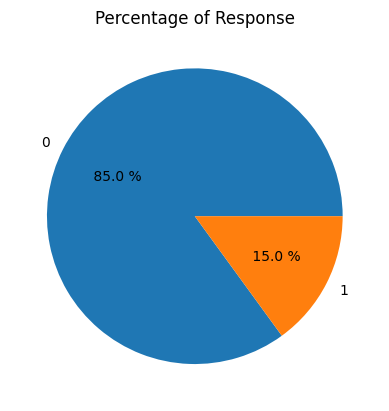

In [46]:
plt.pie(x=df2['Percentage'],
        labels= df2.index,
        autopct='% 1.1f %%')

plt.title('Percentage of Response');

Insight:
15% total customer menerima penawaran di kampanye terakhir dan 85% menolak

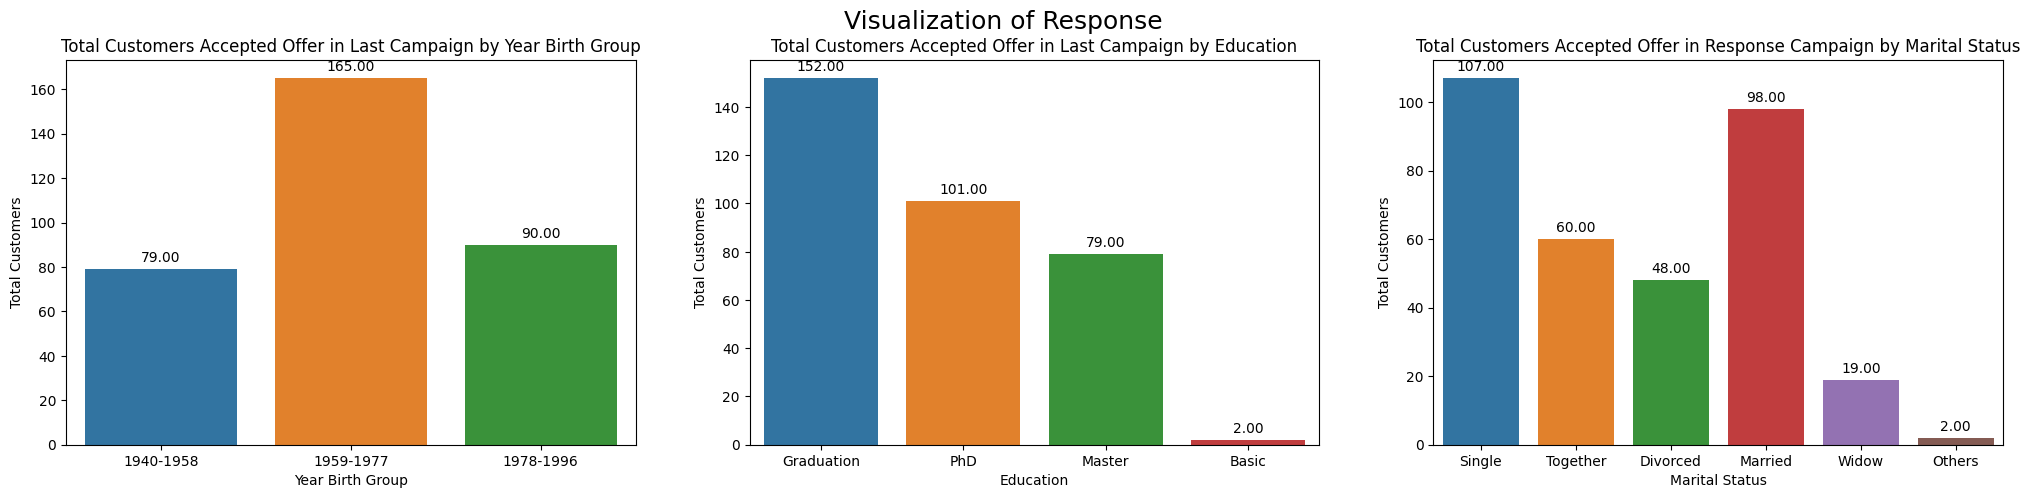

In [47]:
plt.figure(figsize=(25,5))

# plot 1
# Vertical Bar Chart
# plt.subplot(baris, kolom, posisi)
plt.subplot(1, 3, 1)
ax1 = sns.barplot(data=df[df['Response'] == 1],
            x='Year_Birth_Group', 
            y='Response',
            estimator= len,
            ci=0)
plt.title('Total Customers Accepted Offer in Last Campaign by Year Birth Group')
plt.xlabel('Year Birth Group')
plt.ylabel('Total Customers');
for bar in ax1.patches:
    ax1.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

# plot 2
plt.subplot(1, 3, 2)
ax2 = sns.barplot(data=df[df['Response'] == 1],
            x='Education', 
            y='Response',
            estimator= len,
            ci=0)
plt.title('Total Customers Accepted Offer in Last Campaign by Education')
plt.xlabel('Education')
plt.ylabel('Total Customers');
for bar in ax2.patches:
    ax2.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
#plot 3
plt.subplot(1, 3, 3)
ax3 = sns.barplot(data=df[df['Response'] == 1],
            x='Marital_Status', 
            y='AcceptedCmp5',
            estimator= len,
            ci=0)
plt.title('Total Customers Accepted Offer in Response Campaign by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Customers');
for bar in ax3.patches:
    ax3.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.suptitle('Visualization of Response', size=18);

Insight:
- Customer tahun kelahiran 1959-1977 yang paling banyak menerima penawaran di kampanye terakhir
- Customer berpendidikan Graduation yang paling banyak menerima penawaran di kampanye terakhir
- Customer Single yang paling banyak menerima penawaran di kampanye terakhir

## Complain

In [48]:
df['Complain'].sum()

20

Ada 20 customer yang komplain 2 tahun terakhir

## Korelasi Kolom Numerik 

In [49]:
df[KolomNumerik].corr(method='spearman')

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Kidhome,Teenhome
Year_Birth,1.000000,-0.219583,-0.018653,-0.235448,-0.025581,-0.116600,-0.030198,0.003403,-0.075584,-0.090873,-0.165522,-0.182354,-0.169776,0.131985,0.260189,-0.387741
Income,-0.219583,1.000000,0.009204,0.841072,0.587879,0.822133,0.583792,0.574808,0.516511,-0.191884,0.586488,0.796263,0.747909,-0.636939,-0.560084,0.049828
Recency,-0.018653,0.009204,1.000000,0.019930,0.026036,0.030119,0.014742,0.024337,0.018792,0.007872,-0.003339,0.032016,0.006283,-0.021662,0.006548,0.009853
MntWines,-0.235448,0.841072,0.019930,1.000000,0.516345,0.827475,0.523610,0.503839,0.572809,0.053969,0.739125,0.828075,0.806703,-0.397557,-0.584565,0.109615
MntFruits,-0.025581,0.587879,0.026036,0.516345,1.000000,0.716161,0.704516,0.691033,0.566974,-0.115139,0.469539,0.637026,0.583485,-0.450187,-0.452821,-0.201587
MntMeatProducts,-0.116600,0.822133,0.030119,0.827475,0.716161,1.000000,0.729610,0.698734,0.641820,-0.039028,0.684048,0.850666,0.785838,-0.497403,-0.552208,-0.129190
MntFishProducts,-0.030198,0.583792,0.014742,0.523610,0.704516,0.729610,1.000000,0.700797,0.563825,-0.124143,0.464615,0.659873,0.582591,-0.465834,-0.454987,-0.230763
MntSweetProducts,0.003403,0.574808,0.024337,0.503839,0.691033,0.698734,0.700797,1.000000,0.540711,-0.110154,0.461116,0.630541,0.579808,-0.456980,-0.441119,-0.199595
MntGoldProds,-0.075584,0.516511,0.018792,0.572809,0.566974,0.641820,0.563825,0.540711,1.000000,0.087552,0.576565,0.653081,0.536763,-0.270020,-0.430665,-0.023405
NumDealsPurchases,-0.090873,-0.191884,0.007872,0.053969,-0.115139,-0.039028,-0.124143,-0.110154,0.087552,1.000000,0.282801,-0.046185,0.095632,0.397108,0.262946,0.482774


Korelasi diuji dengan metode Spearman karena data Year_Birth dan Income tidak terdistribusi normal. Sehingga, data lainnya diasumsikan juga tidak terdistribusi normal

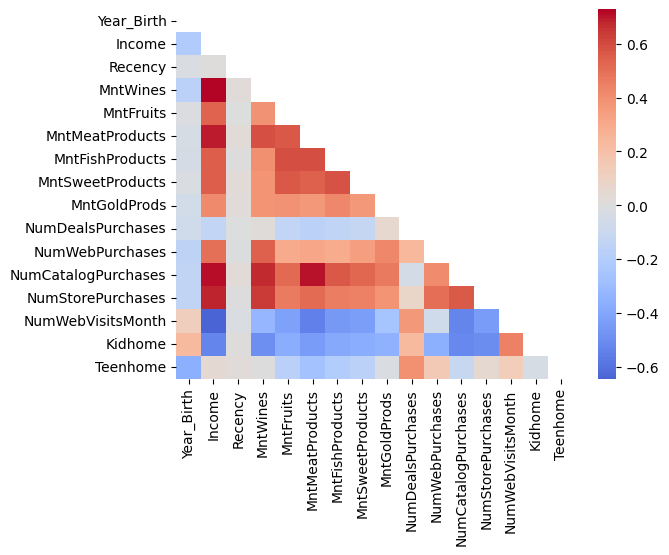

In [50]:
matrix = np.triu(df[KolomNumerik].corr())
sns.heatmap(data=df[KolomNumerik].corr(),
            cmap = 'coolwarm',
            center=0,
            mask=matrix);

Insight:
- Customer yang memiliki anak kecil (Kidhome) mempunyai Income yang lebih rendah daripada yang tidak memiliki anak kecil.
- Customer banyak Income paling banyak membeli produk anggur (MntWines) dan produk daging (MntMeatProducts).
- Customer yang membeli produk anggur juga membeli produk lainnya (MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, dan MntGoldProds).
- Metode belanja customer banyak Income paling banyak dengan datang ke supermarket langsung (NumStorePurchases) dan menggunakan katalog (NumCatalogPurchases).
- Metode belanja customer banyak Income melalui situs perusahaan (NumWebPurchases) pengaruhnya kecil sekali dalam pembelian produk-produk supermarket. Bisa jadi salah satu permasalahan performa supermarket.
- Lamanya customer tidak berbelanja (Recency) di supermarket tidak mempengaruhi performa supermarket.
- Jumlah kunjungan situs perusahaan bulan terakhir menyebabkan berkurangnya pembelian. Hanya mengujungi situs saja daripada membeli.
- Jumlah pembelian dengan menggunakan diskon (NumDealsPurchases) tidak mempengaruhi jumlah pembelian produk-produk di supermarket. Pembelian dengan menggunakan diskon hanya dilakukan oleh customer yang memiliki anak (Kidhome dan Teenhome) meskipun kecil sekali. Kelihatannya diskon hanya untuk customer yang memiliki anak. Tidak untuk yang tidak memiliki anak. Sehingga, pembelian dengan menggunakan diskon sedikit. Permasalahannya kemungkinan disebabkan oleh diskon ini.

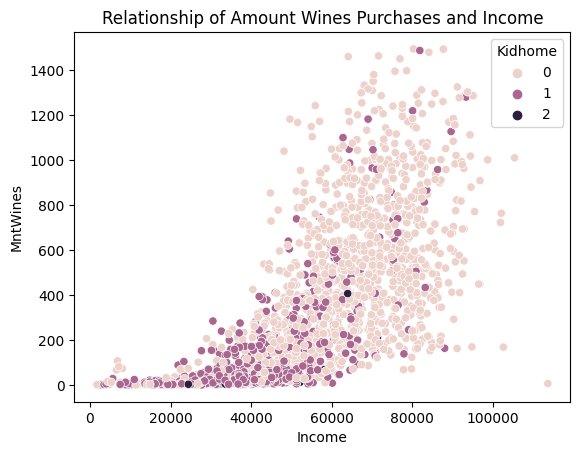

In [51]:
sns.scatterplot(data=df, 
                x='Income',
                y='MntWines',
                hue='Kidhome');
plt.title('Relationship of Amount Wines Purchases and Income');

Insight:
- Semakin besar Income, jumlah pembelian produk anggur semakin banyak
- Semakin banyak jumlah anak, jumlah pembelian produk anggur semakin sedikit

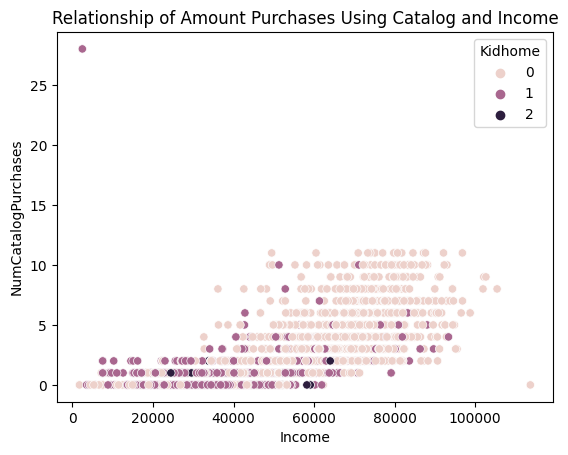

In [52]:
sns.scatterplot(data=df, 
                x='Income',
                y='NumCatalogPurchases',
                hue='Kidhome');
plt.title('Relationship of Amount Purchases Using Catalog and Income');

Insight:
- Semakin besar Income, jumlah pembelian menggunakan katalog semakin banyak
- Semakin banyak jumlah anak, jumlah pembelian menggunakan katalog semakin sedikit

In [53]:
df.to_excel('Supermarket Customers2.xlsx', index=False)

# Kesimpulan

- Berdasarkan tahun kelahiran, customer paling banyak tahun kelahiran 1959-1977 dan menerima penawaran pada kampanye 1 sampai terakhir
- Berdasarkan pendidikan, customer paling banyak berpendidikan Graduation dan menerima penawaran pada kampanye 1 sampai terakhir
- Berdasarkan status perkawinan, customer paling banyak Married dan menerima penawaran pada kampanye 1 sampai 5 kecuali kampanye 2.
- Terjadi penurunan pada saat menerima penawaran di kampanye kedua.
- Customer berpendidikan Basic hanya menerima penawaran di kampanye ketiga dan terakhir.
- Customer banyak Income paling banyak membeli produk anggur (MntWines) dan produk daging (MntMeatProducts).
- Metode belanja customer banyak Income paling banyak dengan datang ke supermarket langsung (NumStorePurchases) dan menggunakan katalog (NumCatalogPurchases).
- Metode belanja customer banyak Income melalui situs perusahaan (NumWebPurchases) pengaruhnya kecil sekali dalam pembelian produk-produk supermarket.
- Jumlah pembelian dengan menggunakan diskon (NumDealsPurchases) sedikit dilakukan oleh customer yang memiliki anak (Kidhome dan Teenhome).


# Rekomendasi

- Penawaran yang menarik untuk pembelian produk emas.
- Penawaran pada kampanye berikutnya menarik semua customer dan kejadian tidak terulang lagi pada kampanye kedua.
- Edukasi mengenai penawaran-penawaran untuk customer berpendidikan Basic.
- Pembenahan pada situs perusahaan sehingga banyak dikunjungi dan membeli produk-produk.
- Pemberian diskon yang menarik semua customer dengan memperhatikan profit setelah pemberian diskon.